In [259]:
#import json file and convert to dataframe
import pandas as pd
import json
from pandas.io.json import json_normalize

#load json file
with open('C:/Users/MehmetCemAkuras/Desktop/3rd Semester/Project Management and Data Analytics Lab/Tweets2GPT/Data/Raw/tweets_ws23_v1.json') as json_file:
    json_data = json.load(json_file)
#show loaded json data
json_data

[{'source_created_at': '2020-09-18 21:56:20.798000',
  'author_id': '593731316',
  'text': '@DSisourath The Thameslink core between London St Pancras and London Blackfriars in rush hours onlybut the in cab rubbish rarely works',
  'source': 'sprinklr',
  'language': 'en',
  'longitude': -0.12574,
  'latitude': 51.50853,
  'id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
  'labels': {'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
     'user_id': 'Z003XDCS',
     'relevant': True,
     'topic': 'service',
     'ground_truth': True,
     'id': '8655353b-cc71-1e89-95d5-1c4e6bf200e1'}],
   'sentiment': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
     'user_id': 'Z003XDCS',
     'sentiment': 'negative',
     'ground_truth': True,
     'id': '5ee4d218-65a9-70a0-0964-a5b00e594a41'}]}},
 {'source_created_at': '2020-10-13 07:31:53.122000',
  'author_id': '745583289520496640',
  'text': '@DulwichHistory Loving the complaint about people having to wait 10 minutes for a train

In [260]:
def get_all_keys(obj):
    keys = set()
    if isinstance(obj, dict):
        keys.update(obj.keys())
        for value in obj.values():
            keys.update(get_all_keys(value))
    elif isinstance(obj, list):
        for item in obj:
            keys.update(get_all_keys(item))
    return keys

# Get all unique keys
all_keys = get_all_keys(json_data)

# Convert the set to a list to see all unique keys
all_keys_list = list(all_keys)
print(all_keys_list)
#Count the 

['user_id', 'latitude', 'text', 'source', 'source_id', 'language', 'ground_truth', 'longitude', 'topic', 'sentiment', 'id', 'relevant', 'labels', 'author_id', 'tweet_id', 'source_created_at']


In [261]:
def flatten_json(y):
    """Flatten a nested JSON object"""
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

# Flatten the JSON data
flattened_data = [flatten_json(entry) for entry in json_data]

# Convert the list of flattened dictionaries to a DataFrame
df = pd.DataFrame(flattened_data)

# Show the DataFrame
df

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels_topic_0_tweet_id,labels_topic_0_user_id,labels_topic_0_relevant,labels_topic_0_topic,labels_topic_0_ground_truth,labels_topic_0_id,labels_sentiment_0_tweet_id,labels_sentiment_0_user_id,labels_sentiment_0_sentiment,labels_sentiment_0_ground_truth,labels_sentiment_0_id,source_id
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41,NaN
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94,NaN
2,2020-10-26 19:27:24.695000,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,2d54f18a-442d-b59b-9daf-0490dc64d21a,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,negative,True,be479c30-17c3-220f-8eae-eaf6fc874431,NaN
3,2020-10-26 19:28:49.281000,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,01db4b72-b21c-60f9-b627-5a47df56655a,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,negative,True,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61,NaN
4,2020-09-28 11:59:41.212000,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,4fe5177f-8347-1726-c2e9-cc183f16d5b1,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,neutral,True,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16944,2019-07-11 07:34:35,24940900,Haha oh man the audio corruption on @TLRailUK ...,brandwatch,en-GB,NaN,NaN,b47948df-1732-7021-ee77-238f839a2ea0,b47948df-1732-7021-ee77-238f839a2ea0,Z003XDCS,True,announcements,True,aca953e8-bec4-216a-5a6e-e3530e420fa9,b47948df-1732-7021-ee77-238f839a2ea0,Z003XDCS,neutral,True,be02e403-49c2-e366-3324-09f1696ce526,1149220424313708544
16945,2020-08-10 11:19:10.181000,63559912,@TLRailUK SweetIs there a plug to charge my ph...,sprinklr,en,-0.12574,51.50853,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,Z003XDCS,True,plugs,True,e170272d-5e5c-6ce7-ba7c-748aa56073d7,bcb3a01a-e58c-e082-3111-10fa77d1a9f7,Z003XDCS,neutral,True,a0c0e79c-11ee-4700-45b2-dcf7234f0a10,NaN
16946,2020-08-29 09:51:10.833000,277455263,@TLRailUK now there are far fewer commuters ha...,sprinklr,en,-0.12574,51.50853,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,Z003XDCS,True,tables,True,356eb822-07b7-ca2d-0087-56284ce2e95b,f440c7e6-9e2d-31c4-3626-b9d8288cbbe3,Z003XDCS,neutral,True,786bb503-8ec0-6a21-ea3f-6995ceb7e3e0,NaN
16947,2020-11-02 12:06:06.967000,3050957613,@geofftech I am voting for Thameslink. 1. in a...,sprinklr,en,-0.12574,51.50853,859ab156-cad3-3bf0-4b6d-de494b483501,859ab156-cad3-3bf0-4b6d-de494b483501,Z003XDCS,True,toilets,True,3f6f4be1-37c7-17cb-56c3-2e91b0ae237a,859ab156-cad3-3bf0-4b6d-de494b483501,Z003XDCS,neutral,True,399d6906-75db-1150-0f34-414c6cf917cf,NaN


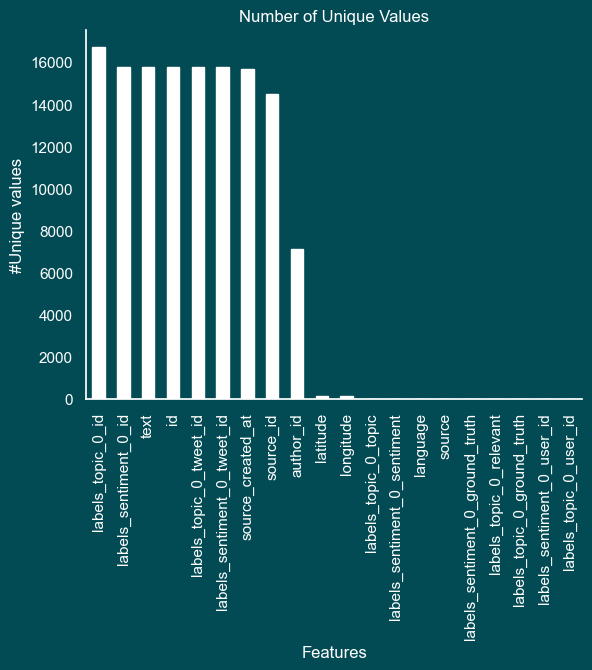

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")  # Set the style to "white"

unique_values = df.nunique()

# Filter out columns with only 1 unique value
unique_values = unique_values[unique_values > 0]

# Filter out the specific label you want to exclude (e.g., 'column name')
unique_values = unique_values[unique_values.index != 'month']

unique_values.sort_values(inplace=True)

# Sort values in descending order
unique_values = unique_values.sort_values(ascending=False)

# Create the bar plot
ax = unique_values.plot.bar()

# Remove the frame but keep the x-axis and y-axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
#Change x and y axis to white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

plt.title('Number of Unique Values', color='white')
plt.ylabel('#Unique values', fontsize=12, color='white')
plt.xlabel('Features', fontsize=12, color='white')
plt.xticks(rotation=90)

plt.grid(False)  # Turn off grid lines
# Set background color
fig = plt.gcf()
fig.set_facecolor('#024B54')

# Set grid color to #024B54
ax.yaxis.grid(color='#024B54')  # Set y-axis grid color
ax.xaxis.grid(color='#024B54')  # Set x-axis grid color

# Set axes background color to #024B54
ax.set_facecolor('#024B54')

# Set bar colors to white
for bar in ax.patches:
    bar.set_facecolor('white')

# Set color of x-axis tick labels to #024B54
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.show()


Totally we have 9 rows that can give valuable information. Therefore we will investigate these 9 rows one by one.

In [263]:
#Show the beginning and end time of the dataset
print(df['source_created_at'].min())
print(df['source_created_at'].max())

2019-01-16 10:41:46
2020-12-01 07:49:12.003000


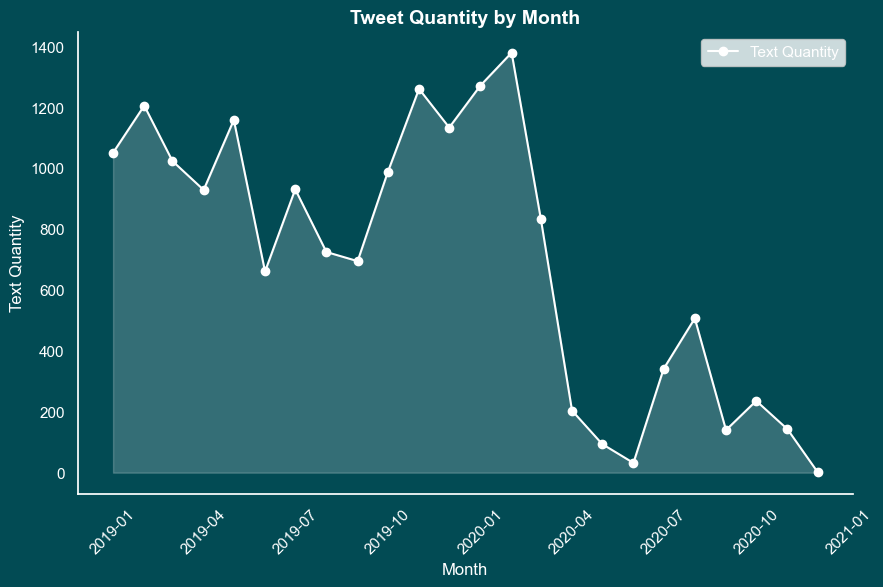

In [264]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'time' is a datetime column, if not, you may need to convert it
df['source_created_at'] = pd.to_datetime(df['source_created_at'])

# Extract the month and year from the 'time' column
df['month'] = df['source_created_at'].dt.to_period('M')

# Group by month and count the number of text entries
monthly_counts = df.groupby('month').size()

# Convert Period objects to datetime values
monthly_counts.index = monthly_counts.index.to_timestamp()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts, marker='o', color='white', label='Text Quantity')
plt.fill_between(monthly_counts.index, monthly_counts, color='white', alpha=0.2)

# Set background color to #024B54
fig = plt.gcf()
fig.set_facecolor('#024B54')

# Set axes background color to #024B54
ax = plt.gca()
ax.set_facecolor('#024B54')

# Remove frame but keep axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')  # Set x-axis color to white
ax.spines['left'].set_color('white')   # Set y-axis color to white

# Remove grid lines
ax.grid(False)

# Set text color to white
plt.rcParams['text.color'] = 'white'

plt.title('Tweet Quantity by Month', color='white', fontsize=14, fontweight='bold')
plt.xlabel('Month', color='white')
plt.ylabel('Text Quantity', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.legend()

plt.show()


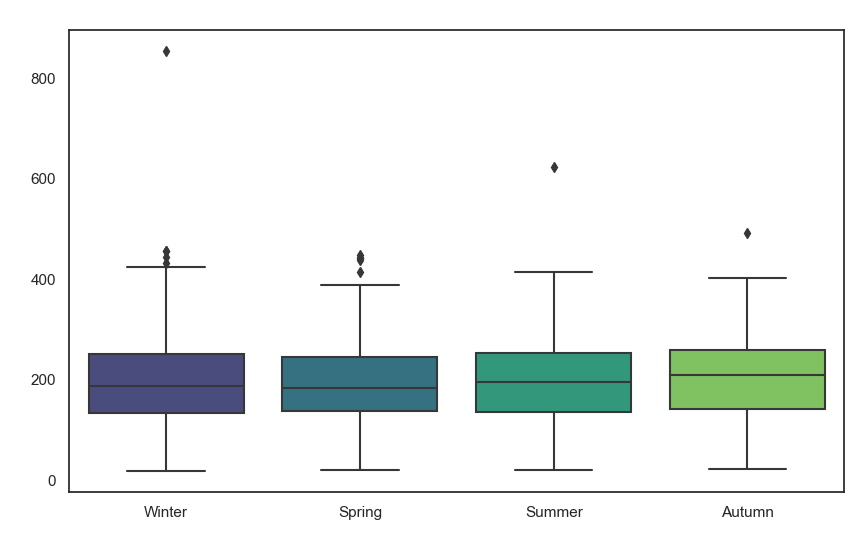

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'source_created_at' contains Unix timestamps
df['source_created_at'] = pd.to_datetime(df['source_created_at'], unit='s')

# Extract month and season from 'source_created_at' and calculate tweet length
df['month'] = df['source_created_at'].dt.month
df['season'] = df['month'].apply(lambda x: 
                ('Winter' if x in [12, 1, 2] else 
                 'Spring' if x in [3, 4, 5] else 
                 'Summer' if x in [6, 7, 8] else 'Autumn'))

df['tweet_length'] = df['text'].str.len()

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='tweet_length', data=df, palette='viridis', order=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Tweet Length by Season')
plt.xlabel('Season')
plt.ylabel('Tweet Length')
plt.show()


In [266]:
#Show unique values of the column labels_sentiment_0_sentiment
df['labels_sentiment_0_sentiment'].unique()

array(['negative', 'neutral', 'positive'], dtype=object)

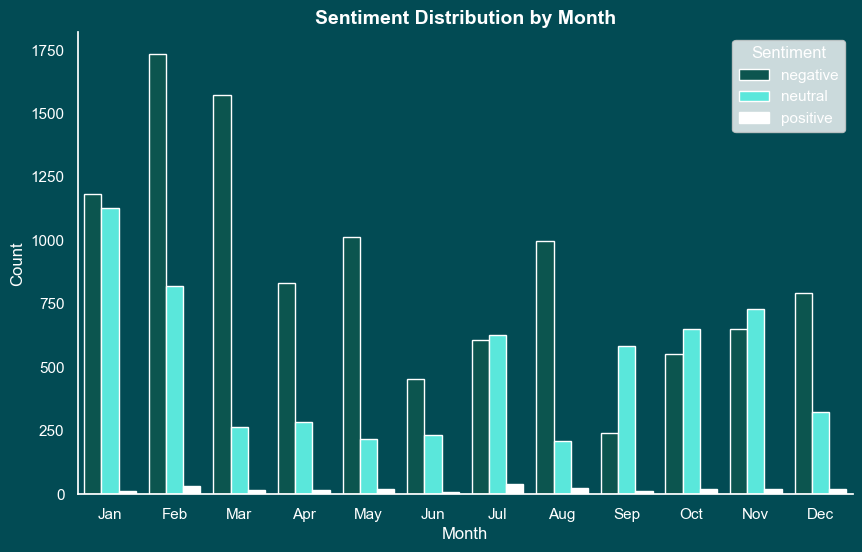

In [267]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'source_created_at' contains Unix timestamps
df['source_created_at'] = pd.to_datetime(df['source_created_at'], unit='s')

# Extract month from 'source_created_at'
df['month'] = df['source_created_at'].dt.month

# Create a custom color palette
custom_palette = ['#006159', '#42FFEE', 'white']

# Create a countplot to visualize sentiment distribution by month
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='month', hue='labels_sentiment_0_sentiment', data=df, palette=custom_palette, order=range(1, 13))

# Set background color to #024B54
fig = plt.gcf()
fig.set_facecolor('#024B54')

# Set axes background color to #024B54
ax.set_facecolor('#024B54')

# Remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')  # Set left spine color to white
ax.spines['bottom'].set_color('white')  # Set bottom spine color to white

# Set x and y labels to white
ax.set_xlabel('Month', color='white', fontsize=12)
ax.set_ylabel('Count', color='white', fontsize=12)

# Set x and y ticks to white
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set legend color
ax.legend(title='Sentiment', title_fontsize=12, labelcolor='white')

#Change x labels to month names
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], color='white')

# Set title color
ax.set_title('Sentiment Distribution by Month', color='white', fontsize=14, fontweight='bold')

plt.show()


C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_13416\2584760157.py:12: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_13416\2584760157.py:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_13416\2584760157.py:14: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\MehmetCemAkuras\AppData\Local\Temp\ipykernel_13416\2584760157.py:34: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.



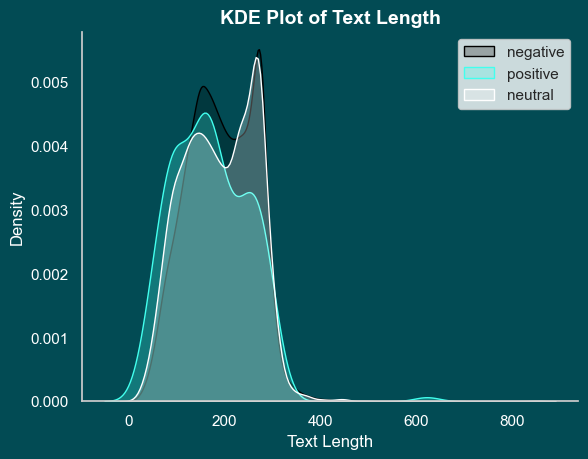

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'source_created_at' contains Unix timestamps
df['source_created_at'] = pd.to_datetime(df['source_created_at'], unit='s')
df['month'] = df['source_created_at'].dt.month

df['text_length'] = df['text'].str.len()

# Create KDE plot for each sentiment with specified colors
sns.set(style="whitegrid")
sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'negative'], color="black", shade=True)
sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'positive'], color="#42FFEE", shade=True)
sns.kdeplot(df['text_length'][df['labels_sentiment_0_sentiment'] == 'neutral'], color="White", shade=True)
plt.legend(['negative', 'positive', 'neutral'])
plt.title('KDE Plot of Text Length', fontsize=14, fontweight='bold', color='white')

ax = plt.gca()
ax.set_facecolor('#024B54')
sns.despine()

# Set background color to #024B54
fig = plt.gcf()
fig.set_facecolor('#024B54')

# Set x and y labels to white
ax.set_xlabel('Text Length', color='white', fontsize=12)
ax.set_ylabel('Density', color='white', fontsize=12)

# Set x and y ticks to white
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.grid(False, axis='both', linestyle='-', color='None')

plt.show()


In [269]:
import plotly.graph_objects as go

# Define colors
colors = ['#006159', 'white', '#42FFEE']

# Create a Funnel Chart
fig = go.Figure(go.Funnelarea(
    text=custom_labels,  # Set custom labels
    values=df['labels_sentiment_0_sentiment'].value_counts().values,
    title={"position": "top center", "text": "Funnel-Chart of the Sentiment", "font": {"color": "white", "size": 14}},
    marker=dict(colors=colors)
))

# Set background color to #091B27
fig.update_layout(paper_bgcolor='#024B54')


fig.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


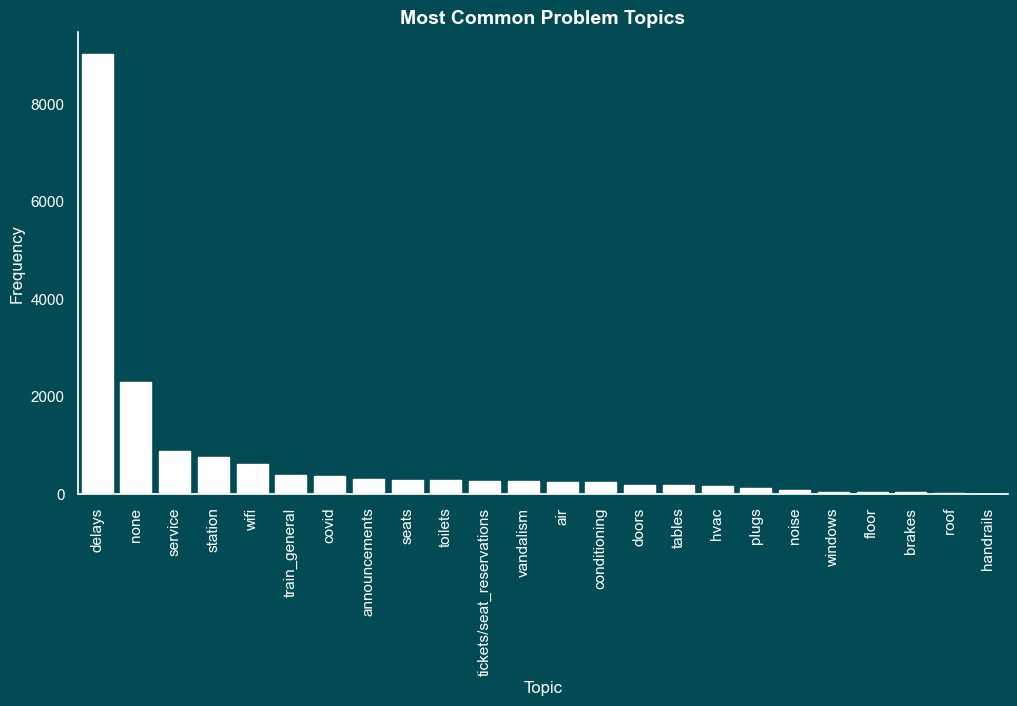

In [270]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preprocess the data
nltk.download('stopwords')
stop = stopwords.words('english')
df['labels_topic_0_topic'] = df['labels_topic_0_topic'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Count most common words
most_common_words = Counter(" ".join(df['labels_topic_0_topic']).split()).most_common()
most_common_words = pd.DataFrame(most_common_words)
most_common_words.columns = ['word', 'frequency']

# Define colors to match the second graph
colors = ['#024B54']

# Create bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='word', y='frequency', data=most_common_words, palette=colors)
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
plt.xlabel('Topic', color='white')
plt.ylabel('Frequency', color='white')
plt.title('Most Common Problem Topics', color='white', fontsize=14, fontweight='bold')

# Set background color
fig = plt.gcf()
fig.set_facecolor('#024B54')

# Set grid color to #091B27
ax.yaxis.grid(color='#024B54')  # Set y-axis grid color
ax.xaxis.grid(color='#024B54')  # Set x-axis grid color

# Set axes background color to #091B27
ax.set_facecolor('#024B54')

# Set bar colors to white
for bar in ax.patches:
    bar.set_facecolor('white')

#Remove frame but keep axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')  # Set left spine color to white
ax.spines['bottom'].set_color('white')  # Set bottom spine color to white


plt.show()


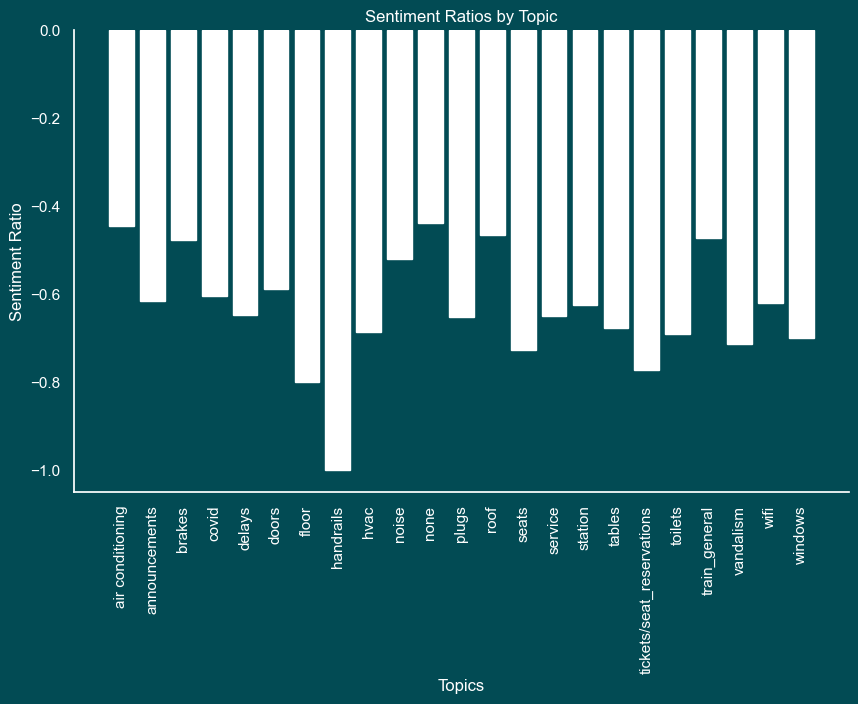

In [271]:
# Calculate sentiment ratio for each topic
sentiment_ratios = (df.groupby('labels_topic_0_topic')['labels_sentiment_0_sentiment']
                     .apply(lambda x: (x == 'positive').sum() - (x == 'negative').sum())
                     .div(df['labels_topic_0_topic'].value_counts()))

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sentiment_ratios.index, sentiment_ratios.values, color='white')
plt.title('Sentiment Ratios by Topic', color='white')  # Change title color to white
plt.xlabel('Topics', color='white')  # Change x-axis label color to white
plt.ylabel('Sentiment Ratio', color='white')  # Change y-axis label color to white
plt.xticks(rotation=90, color='white')  # Change x-axis ticks color to white

# Define colors to match the second graph
colors = ['#024B54']

# Set background color
fig = plt.gcf()
fig.set_facecolor('#024B54')

# Set grid color to #091B27
ax = plt.gca()
ax.yaxis.grid(color='#024B54')  # Set y-axis grid color
ax.xaxis.grid(color='#024B54')  # Set x-axis grid color

# Set axes background color to #091B27
ax.set_facecolor('#024B54')

# Set bar colors to white
for bar in bars:
    bar.set_facecolor('white')

# Remove frame but keep axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')  # Set left spine color to white
ax.spines['bottom'].set_color('white')  # Set bottom spine color to white

# Set x-axis label color to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

# Manually set y-axis label color to white
plt.ylabel('Sentiment Ratio', color='white')

# Set y-axis ticks color to white
ax.tick_params(axis='y', colors='white')

plt.show()


In [272]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Assuming df is your DataFrame and it contains a 'text' column
# Combine all text into one string
all_text = ' '.join(df['text'])

# Tokenize the text
tokens = nltk.word_tokenize(all_text)

# Remove punctuation and lowercase the words
words = [word.lower() for word in tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Get the most common 20 words
word_frequencies = Counter(filtered_words).most_common(20)

# Print the most common words
print(word_frequencies)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MehmetCemAkuras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

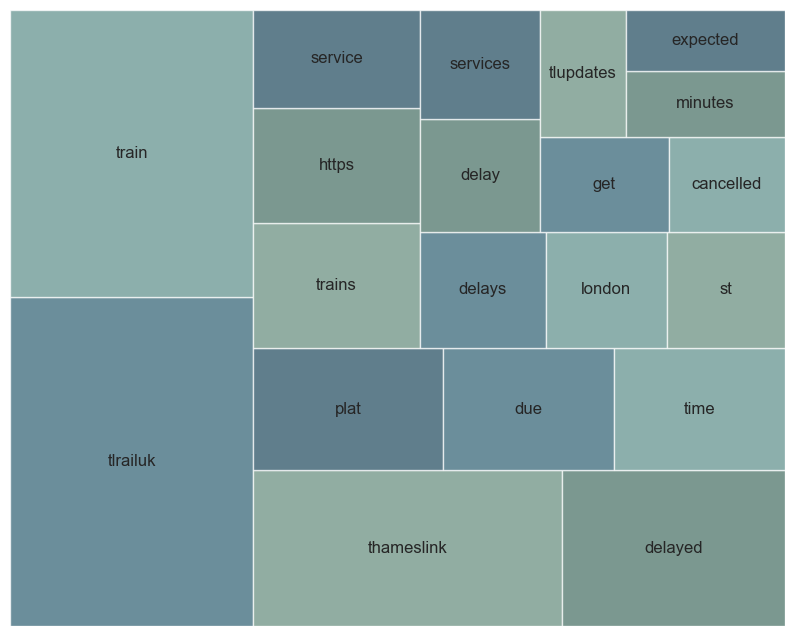

In [ ]:
import squarify
import matplotlib.pyplot as plt

# Assuming word_frequencies is a list of tuples containing word frequencies
# Example: word_frequencies = [('word1', 10), ('word2', 8), ...]

# Extract words and frequencies
words, frequencies = zip(*word_frequencies)

# Create labels and sizes for the treemap
labels = words
sizes = frequencies

# Define the custom color palette
colors = ['#2c5f71', '#5b8d89', '#628b7b', '#436d61', '#1d475c']

# Create the treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
plt.axis('off')

# Display the treemap
plt.show()


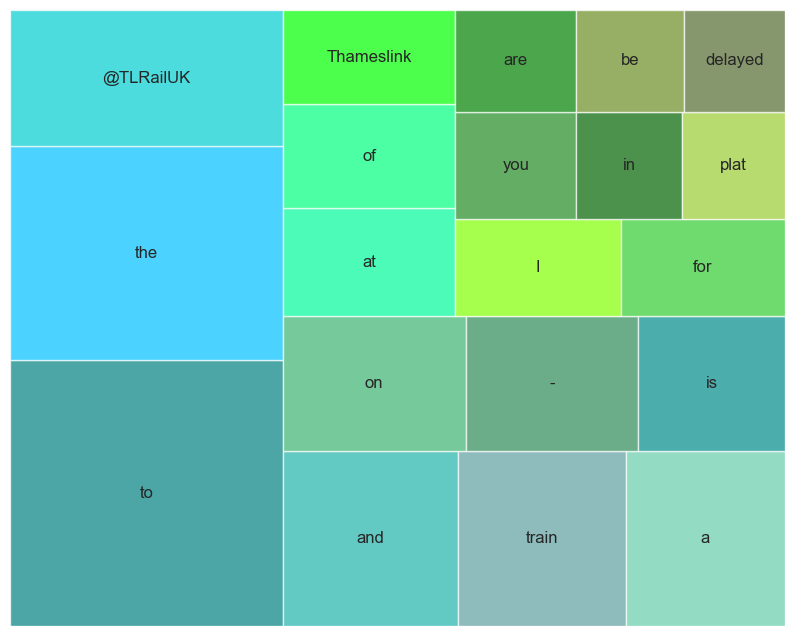

In [273]:
import matplotlib.pyplot as plt
import squarify
from wordcloud import WordCloud

# Generate word frequencies for the top 20 words
word_frequencies = df['text'].str.split(expand=True).stack().value_counts().head(20)

# Create labels and sizes for the treemap
labels = word_frequencies.index
sizes = word_frequencies.values

# Create a custom color palette (blue-green)
colors = ['#008080', '#00BFFF', '#00CED1', '#20B2AA', '#5F9EA0', '#66CDAA', '#3CB371', '#2E8B57', '#008B8B', '#00FA9A',
          '#00FF7F', '#00FF00', '#7FFF00', '#32CD32', '#228B22', '#008000', '#006400', '#9ACD32', '#6B8E23', '#556B2F']

# Create the treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
plt.axis('off')

# Display the treemap
plt.show()


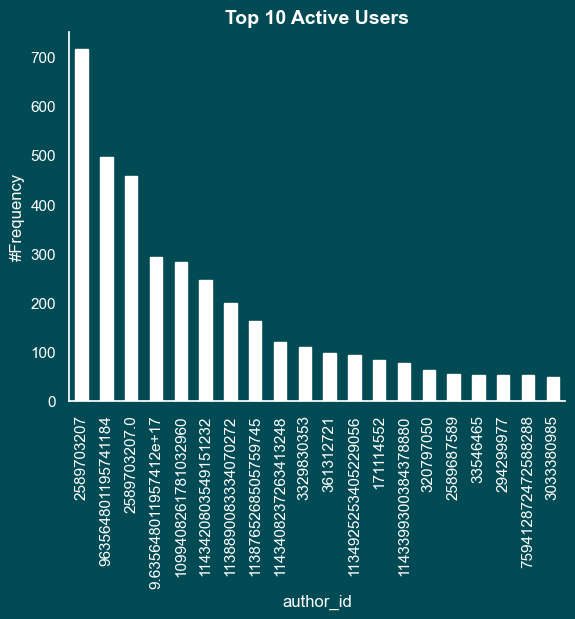

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some data for demonstration purposes
# Replace this with your actual data
top_20_users = df['author_id'].value_counts().head(20)

# Create a bar plot
top_20_users.plot.bar(color='white')  # Set bar colors to white

plt.title('Top 10 Active Users', color='white', fontsize=14, fontweight='bold')
plt.ylabel('#Frequency', color='white', fontsize=12)
plt.xlabel('author_id', color='white', fontsize=12)
plt.xticks(rotation=90, color='white')  # Set x tick color to white
plt.yticks(color='white')  # Set y tick color to white

# Set background color
fig = plt.gcf()
fig.set_facecolor('#024B54')

# Access the current Axes
ax = plt.gca()

# Set grid color to #024B54
ax.yaxis.grid(color='#024B54')  # Set y-axis grid color
ax.xaxis.grid(color='#024B54')  # Set x-axis grid color

# Set axes background color to #024B54
ax.set_facecolor('#024B54')

# Remove frame but keep axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')  # Set left spine color to white
ax.spines['bottom'].set_color('white')  # Set bottom spine color to white

plt.show()


In [ ]:
#Find top 10 author_id used #TLUpdates hashtag most
df[df['text'].str.contains('#TLUpdates')]['author_id'].value_counts().head(10)

2589703207                654
2589703207.0              428
745186633146732544          5
9.696464157932787e+17       4
9.949848573390889e+17       3
2589687589                  3
1.1174226123831745e+18      2
72557932                    2
969646415793278978          2
1085935240739282944         2
Name: author_id, dtype: int64

In [ ]:
#Find top 10 author_id used (Thameslink Update) word most
df[df['text'].str.contains('Thameslink Update')]['author_id'].value_counts().head(10)

963564801195741184       496
9.635648011957412e+17    294
Name: author_id, dtype: int64

In [275]:
#Find top 10 author_id used Service Indicator Update: word most 
df[df['text'].str.contains('Service Indicator Update:')]['author_id'].value_counts().head(10)

1099408261781032960    49
Name: author_id, dtype: int64

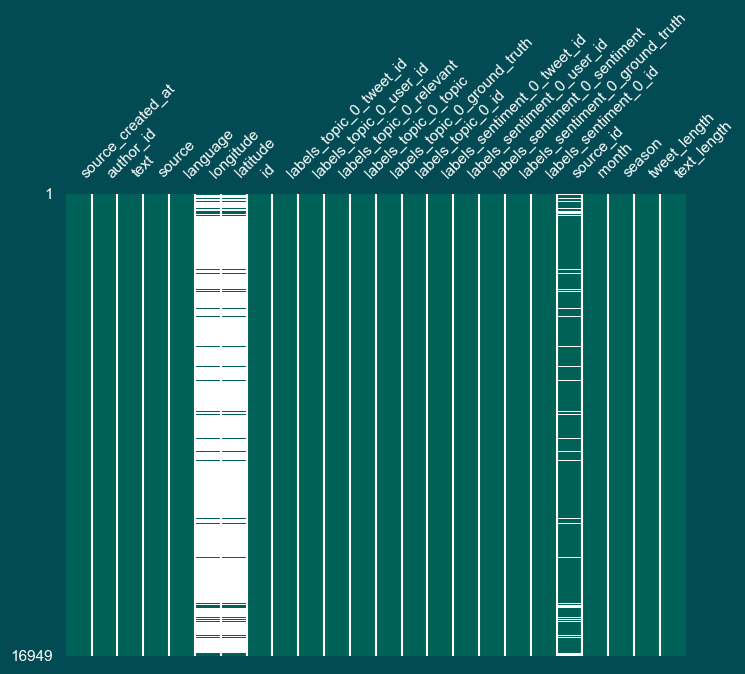

In [276]:
import missingno as msno
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a missing value matrix without displaying it
msno.matrix(df, ax=ax, color=(0, 0.3804, 0.3490), sparkline=False)

# Modify the bar patches to change the background color
for i, bar in enumerate(ax.patches):
    if i % 2 == 0:
        bar.set_facecolor('#006159')
    else:
        bar.set_facecolor('#024B54')

# Set the background color of the plot
fig.patch.set_facecolor('#024B54')
ax.set_facecolor('#024B54')

# Change label colors and size
ax.tick_params(axis='both', colors='white', labelsize=11)

plt.show()


In [277]:
#Text Length Outliers
import pandas as pd

# Assuming df is your DataFrame with a 'text' column

# Calculate the length of each text
df['text_length'] = df['text'].str.len()

# Calculate the IQR
Q1 = df['text_length'].quantile(0.25)
Q3 = df['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['text_length'] < lower_bound) | (df['text_length'] > upper_bound)]

# Print the outliers
print(outliers)


            source_created_at                         author_id  \
2583  2019-05-10 09:52:25.000                      2195725435.0   
2584  2019-05-10 09:52:25.000                      2195725435.0   
2585  2019-05-10 08:57:28.000             8.872797205214862e+17   
3170  2020-01-17 14:43:02.000                         142012778   
3218  2019-05-10 10:13:39.000             9.720438876562186e+17   
3732  2019-02-19 20:31:15.000               1082945206079627265   
10412 2019-11-20 18:25:45.000                          42656049   
12019 2020-07-01 19:15:45.122  9052e1e9352583c51ae9f6adebb1000f   
15306 2020-01-17 15:35:22.000                        2195725435   
15307 2020-01-17 15:43:13.000                        2195725435   
15359 2020-01-08 09:58:13.000                866542768960802817   

                                                    text      source language  \
2583   @AlansTweets @HS2theTruth @Reytomas1228 @Annie...  brandwatch    en-GB   
2584   @AlansTweets @HS2theTruth 

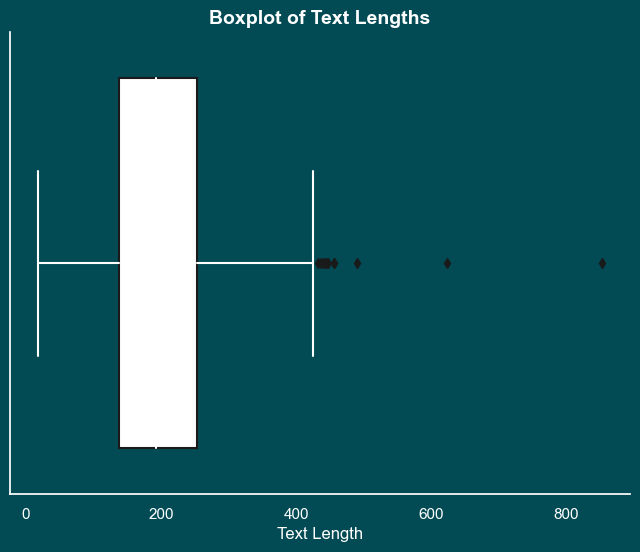

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with a 'text' column

# Calculate the length of each text
df['text_length'] = df['text'].str.len()

# Set the background color and remove grids
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid", rc={"axes.facecolor": "#024B54", "axes.grid": False, "xtick.color": "white", "ytick.color": "white"})

# Create a boxplot with white box color
ax = sns.boxplot(x=df['text_length'], color='#024B54', boxprops=dict(facecolor='white'))

# Set labels and title
plt.xlabel('Text Length', color='white')
plt.title('Boxplot of Text Lengths', color='white', fontsize=14, fontweight='bold')

# Set the color of the y-axis label and ticks
plt.ylabel('')
plt.yticks(color='white')

# Set background color
fig = plt.gcf()
fig.set_facecolor('#024B54')

# Set grid color to #091B27
ax.yaxis.grid(color='#024B54')  # Set y-axis grid color
ax.xaxis.grid(color='#024B54')  # Set x-axis grid color

# Set axes background color to #024B54
ax.set_facecolor('#024B54')

# Set bar colors to white
for bar in ax.patches:
    bar.set_facecolor('white')

# Set color of x-axis tick labels to #024B54
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set the color of the x-axis ticks
plt.xticks(color='white')

# Change tails of the boxplot to white
for line in ax.lines:
    line.set_color('white')

# Change outlier points to white
for flier in ax.artists:
    flier.set_markerfacecolor('white')

#Remove frame but keep axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')  # Set left spine color to white
ax.spines['bottom'].set_color('white')  # Set bottom spine color to white

#Change colour of outliers
for flier in ax.artists:
    flier.set_edgecolor('white')

# Show the plot
plt.show()
